**CARGA DE LIBRERIAS**

In [18]:
pip install pandas matplotlib squarify

Note: you may need to restart the kernel to use updated packages.


In [19]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import squarify

In [8]:
path = os.path.join('Datos', 'Originales', 'cancellation_data_for_mondragon_unibertsitatea_2024.csv')
df = pd.read_csv(path)

In [9]:
formato = "%b %d, %Y, %H:%M"

df["booked_at"] = pd.to_datetime(df["booked_at"], format=formato, errors="coerce")
df["checkin_time"] = pd.to_datetime(df["checkin_time"], format=formato, errors="coerce")
df["checkout_time"] = pd.to_datetime(df["checkout_time"], format=formato, errors="coerce")
df["asset_opening_date"] = pd.to_datetime(df["asset_opening_date"], format=formato, errors="coerce")

In [10]:
primera_fecha_booked = df["booked_at"].min()
ultima_fecha_booked = df["booked_at"].max()

In [11]:
primera_fecha_checkin = df["checkin_time"].min()
ultima_fecha_checkin = df["checkin_time"].max()

In [12]:
primera_fecha_checkout = df["checkout_time"].min()
ultima_fecha_checkout = df["checkout_time"].max()

In [13]:
primera_fecha_asset = df["asset_opening_date"].min()
ultima_fecha_asset = df["asset_opening_date"].max()

In [15]:
print("Booked at: desde", primera_fecha_booked, "hasta", ultima_fecha_booked)
print("Checkin time: desde", primera_fecha_checkin, "hasta", ultima_fecha_checkin)
print("Checkout time: desde", primera_fecha_checkout, "hasta", ultima_fecha_checkout)
print("Asset opening date: desde", primera_fecha_asset, "hasta", ultima_fecha_asset)

Booked at: desde NaT hasta NaT
Checkin time: desde NaT hasta NaT
Checkout time: desde NaT hasta NaT
Asset opening date: desde NaT hasta NaT


C:\Users\aketx\AppData\Local\Temp\ipykernel_39896\947393999.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


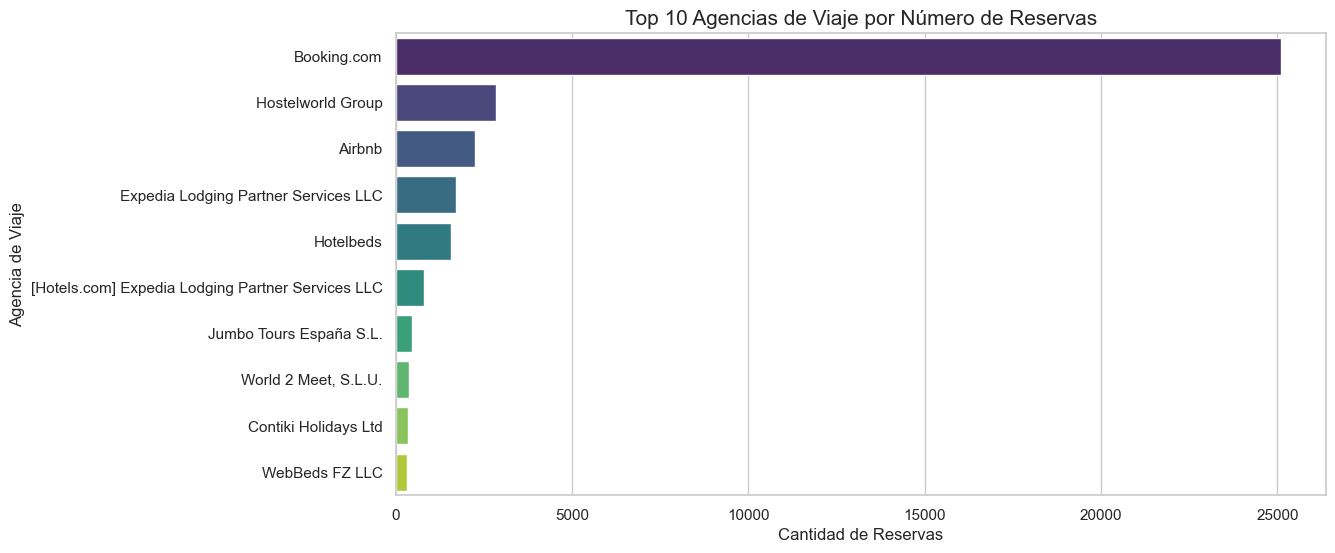

In [16]:




# Configurar el estilo visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Calcular el Top 10 de agencias para evitar saturar el gráfico
top_n = 10
top_agencies = df['travel_agency_name'].value_counts().iloc[:top_n].index

# Crear el gráfico
sns.countplot(
    data=df, 
    y='travel_agency_name', 
    order=top_agencies, 
    palette='viridis'
)

# Añadir títulos y etiquetas
plt.title(f'Top {top_n} Agencias de Viaje por Número de Reservas', fontsize=15)
plt.xlabel('Cantidad de Reservas', fontsize=12)
plt.ylabel('Agencia de Viaje', fontsize=12)

# Mostrar el gráfico
plt.show()

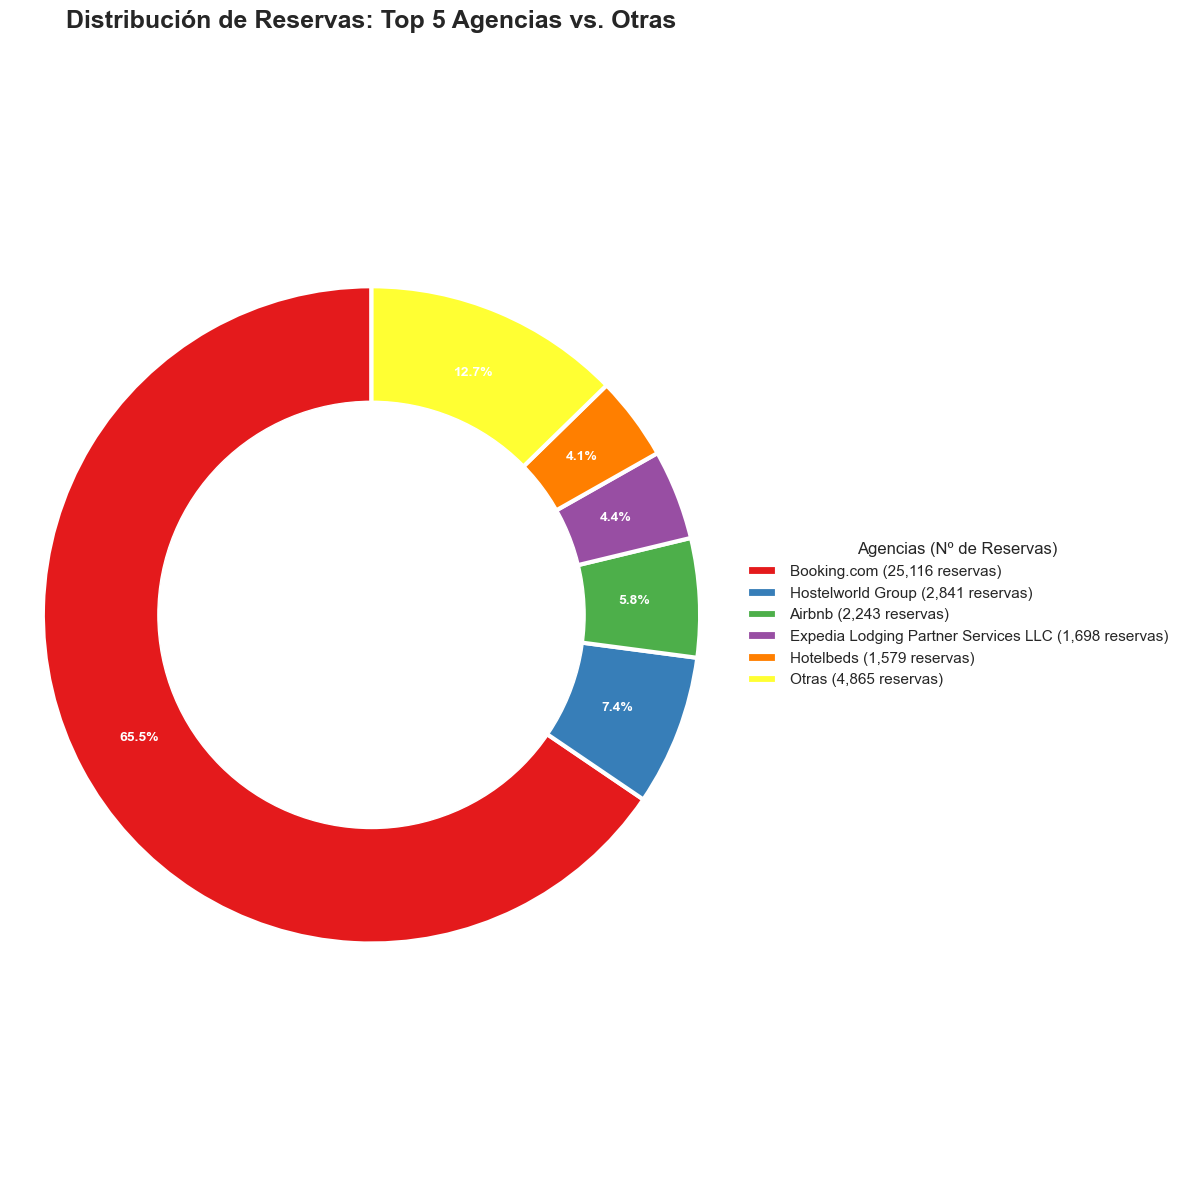

In [29]:


# 2. Contar frecuencias y Agrupar las 5 principales y el resto
top_n = 5
agency_counts = df['travel_agency_name'].value_counts()
top_agencies = agency_counts.head(top_n)
other_count = agency_counts.iloc[top_n:].sum()

if other_count > 0:
    plot_data = pd.concat([top_agencies, pd.Series({'Otras': other_count})])
else:
    plot_data = top_agencies

# 3. Preparamos las etiquetas
# Función para etiquetar las porciones (muestra el porcentaje)
def percentage_label(pct):
    # Solo muestra el porcentaje si es significativo (> 3%)
    return f'{pct:.1f}%' if pct > 3 else ''

# Etiquetas detalladas de la leyenda (Nombre y Conteo)
legend_labels = [f'{name} ({count:,} reservas)' for name, count in zip(plot_data.index, plot_data.values)]

# --- VISUALIZACIÓN (Gráfico de Dona con Estilo Limpio) ---

# 4. Configurar el estilo y paleta
# Usamos un estilo de Seaborn con fondo limpio
plt.style.use('seaborn-v0_8-whitegrid') 
sns.set_palette("Set1") # Paleta de colores más saturada y diferente

plt.figure(figsize=(12, 12))

# Crear el Gráfico de Pastel (Pie Chart)
plt.pie(
    plot_data.values,
    # Muestra el porcentaje calculado en las porciones
    autopct=percentage_label, 
    startangle=90,
    pctdistance=0.8, # Distancia de las etiquetas de porcentaje
    wedgeprops={
        'edgecolor': 'white', # Borde blanco sutil para un look limpio
        'linewidth': 3, 
        'antialiased': True
    },
    textprops={'fontsize': 10, 'fontweight': 'bold', 'color': 'white'} # Texto en blanco dentro de las porciones
)

# 5. Transformar a Gráfico de Dona
centre_circle = plt.Circle((0,0), 0.65, fc='white') # Círculo más grande para un anillo más delgado
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 6. Configuración final
plt.title(f'Distribución de Reservas: Top {top_n} Agencias vs. Otras', fontsize=18, fontweight='bold', pad=20)
plt.legend(
    legend_labels, 
    title="Agencias (Nº de Reservas)", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1), # Posición de la leyenda fuera del gráfico
    frameon=False # Leyenda sin marco para un look minimalista
)
plt.axis('equal') 
plt.tight_layout() # Ajustar el layout

# 7. Mostrar el gráfico
plt.show()

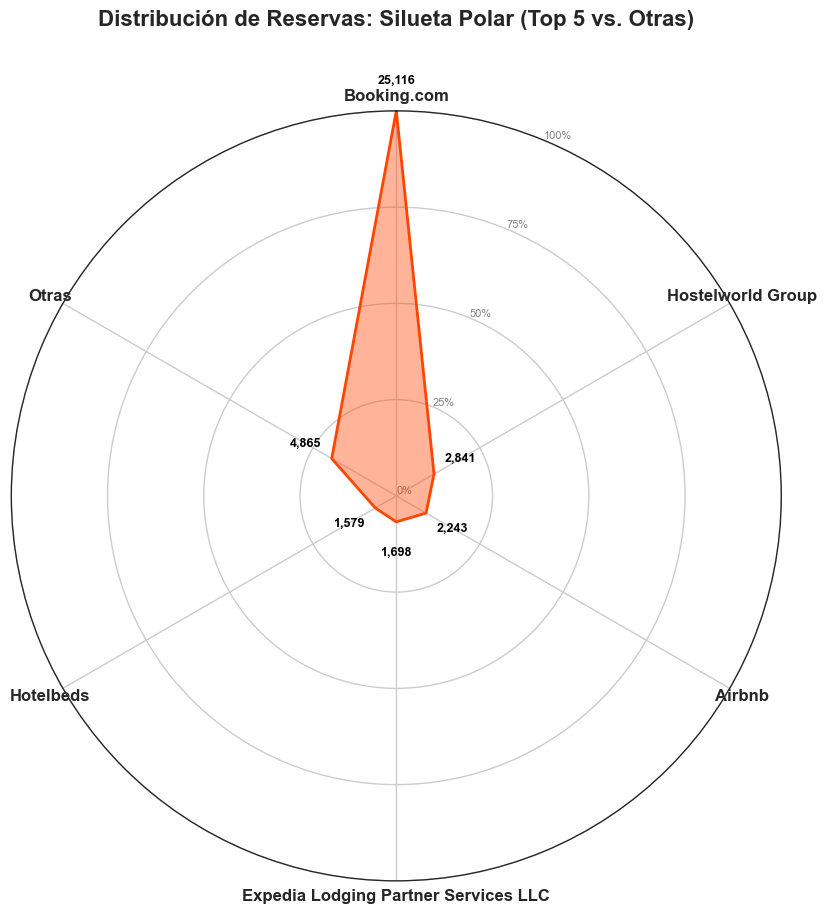

In [33]:

# 2. Contar frecuencias y Agrupar las 5 principales y el resto
top_n = 5
agency_counts = df['travel_agency_name'].value_counts()
top_agencies = agency_counts.head(top_n)
other_count = agency_counts.iloc[top_n:].sum()

if other_count > 0:
    plot_data = pd.concat([top_agencies, pd.Series({'Otras': other_count})])
else:
    plot_data = top_agencies

# 3. Preparar los datos para el gráfico polar
categories = plot_data.index.tolist()
N = len(categories) # Número de variables (6)

# Convertir los conteos a un array y normalizar (para que los valores se ajusten bien al radio)
values = plot_data.values
# Normalizar los valores (opcional, pero ayuda a la visualización)
max_val = values.max()
values_normalized = values / max_val * 100 

# El ángulo de cada eje
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1] # Cierra el círculo
values_normalized = np.append(values_normalized, values_normalized[0]) # Cierra el círculo

# --- VISUALIZACIÓN (Gráfico de Área Polar) ---

plt.figure(figsize=(10, 10))
# Creamos un subplot polar
ax = plt.subplot(111, polar=True) 
ax.set_theta_offset(np.pi / 2) # Poner el eje vertical arriba
ax.set_theta_direction(-1) # En sentido de las agujas del reloj

# 4. Dibujar la silueta (el área)
ax.plot(angles, values_normalized, linewidth=2, linestyle='solid', color='#FF4500') # Línea viva
ax.fill(angles, values_normalized, color='#FF4500', alpha=0.4) # Rellenar el área

# 5. Configurar los ejes
# Etiquetas de los ejes (nombres de las agencias)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')

# Quitar las etiquetas de los radios (los números)
ax.set_yticks(np.arange(0, 101, 25))
ax.set_yticklabels([f'{v}%' for v in np.arange(0, 101, 25)], color="gray", fontsize=8) 
ax.set_ylim(0, 100) # El límite superior es 100 (el valor máximo normalizado)

# Añadir el título
plt.title(f'Distribución de Reservas: Silueta Polar (Top {top_n} vs. Otras)', 
          size=16, y=1.1, fontweight='bold')

# 6. Añadir etiquetas de valor absoluto cerca de los picos
for angle, value, count in zip(angles[:-1], values_normalized[:-1], values):
    ax.text(
        angle, 
        value + 8, # Un poco fuera del pico
        f'{count:,}', # Conteo de reservas
        ha='center', 
        va='center', 
        fontsize=9, 
        color='black',
        fontweight='bold'
    )

# 7. Mostrar el gráfico
plt.show()